In [12]:


from utils import *

%matplotlib inline
# jupyters notebook Befehl zum direkten Anzeigen von Matplotlib Diagrammen
plt.rcParams['figure.figsize'] = (9, 6)
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25
colormap={0:'red',1:'green'}
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True 
plt.rcParams['xtick.labelsize'] = plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['xtick.major.size'] = plt.rcParams['ytick.major.size'] = 7
plt.rcParams['xtick.minor.size'] = plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['xtick.major.width'] = plt.rcParams['ytick.major.width'] = 1.6
plt.rcParams['font.size'] = 12

from dust_extinction.parameter_averages import G23 as ext_model


Here you have to set the path where the files are

In [13]:

dust_path='./Q-curves/fitting-Qcurves/Q_GRF/'
slab_folder='/data/tk502/LineData/'

In [14]:
old_version=False
continuum_penalty=False
radial_version=True
save_mol_flux=False

# examples

Below you find a list of use cases for the model

## Varibale dicts

First you see example dictonaries with all the input parameters

- distance: distance to object in pc


- tstar: stellar temperature in Kelvin
- rstar: stellar radius in solar radii
- bb_star: bool, True: using the stellar temperature to create a Black body, False: using input spectum (read_data(stellar_file))


- if t_rim is set: rim is black body with temperature t_rim


- if tmax_rim, tmin_rim, and q_rim are set: rim is temperature power law distribution


    - tmax_rim: maximum temperature of inner rim
    - tmin_rim: minimum temperature of inner rim
    - q_rim: exponent of the temperature powerlaw distribution
    - sc_rim: scale factor of the rim

- tmax_mp: maximum temperature of midplane
- tmin_mp: minimum temperature of midplane
- q_mid: exponent of the temperature powerlaw distribution
- sc_mid: scale factor of the midplane


- tmax_s: maximum temperature of surface layer
- tmin_s: minimum temperature of surface layer
- q_thin: exponent of the temperature powerlaw distribution

- the species (their Q-files) and their scaling factors (sc) are defined in dust_species

- q_emis: exponent of the temperature powerlaw distribution for the molecular layer




In [33]:
# this dictonary has a single temperature for the inner rim
var_dict={'tstar':9000,
         'rstar':2.5,
         'distance':140,
         't_rim':1500.6,
         'tmin_s':50.3,
         'tmax_s':1000.1,
         'tmin_mp':99.3,
         'tmax_mp':1100.4,
         'sc_ir':1e-16,
         'sc_mid':1e-6,
         'q_mid':-0.6,
         'q_thin':-0.55,
         'q_emis':-0.55,
         'bb_star':True,
         'incl':0.0,
         'Rv':3.1,
         'E(B-V)':0.5
         }


## Abundance dict

The second dictonary that is needed to run the model is the abundance_dict.

It sets what dust components are used and their scale factors.

The names of the species should be their file names.

with dust_path you can specify the folder in which there files are


In [34]:
#here all factors are the same, but they can be different of course
test_fac=1e-6

abundance_dict={'MgOlivine0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'MgOlivine1.0.Combined.Kappa_rv1.0.dat',
                'MgOlivine2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'MgOlivine3.0.Combined.Kappa_rv3.0.dat',
                #'MgOlivine4.0.Combined.Kappa_rv4.0.dat',
                'MgOlivine5.0.Combined.Kappa_rv5.0.dat':test_fac,
                
                
                'MgPyroxene0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'MgPyroxene1.0.Combined.Kappa_rv1.0.dat',
                'MgPyroxene2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'MgPyroxene3.0.Combined.Kappa_rv3.0.dat',
                #'MgPyroxene4.0.Combined.Kappa_rv4.0.dat',
                'MgPyroxene5.0.Combined.Kappa_rv5.0.dat':test_fac,
                
                
                'Silica0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'Silica1.0.Combined.Kappa_rv1.0.dat',
                'Silica2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'Silica3.0.Combined.Kappa_rv3.0.dat',
                #'Silica4.0.Combined.Kappa_rv4.0.dat',
                'Silica5.0.Combined.Kappa_rv5.0.dat':test_fac,

                'Enstatite0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'Enstatite1.0.Combined.Kappa_rv1.0.dat',
                'Enstatite2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'Enstatite3.0.Combined.Kappa_rv3.0.dat',
                #'Enstatite4.0.Combined.Kappa_rv4.0.dat',
                'Enstatite5.0.Combined.Kappa_rv5.0.dat':test_fac,

                'Forsterite0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'Forsterite1.0.Combined.Kappa_rv1.0.dat',
                'Forsterite2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'Forsterite3.0.Combined.Kappa_rv3.0.dat',
                #'Forsterite4.0.Combined.Kappa_rv4.0.dat',
                'Forsterite5.0.Combined.Kappa_rv5.0.dat':test_fac}

# Slab dict

The third dictonary needed to run the model is the slab dict.

It contains all molecules for which the emission should be included in the model

Every molecule has a column density range, a temperature range and an emitting radius (scale factor).  
You can also run it with a single value for the column density or a single value for both temperature and column density.

- ColDens: fixed column density  
or  
- ColDens_tmin: column density at tmin
- ColDenstmax: column density at tmax

- temis: emission temperature  
or   
- tmin: minimum emission temperature
- tmax: maximum emission temperature

- radius: inner radius where the temperature power law starts (for t-ranges), for single value temperatures it is the radius of the emitting area

In [35]:
slab_dict={
            'CO2':{'ColDens':1e18,
                    'tmax':500,
                    'tmin':200,
                     'radius':0.3
                    },
            'H2O':{'ColDens':5e17,
                    'tmax':921.1,
                    'tmin':221,
                     'radius':0.3
                    },

          }

## running the model

To run the model you need to do 3 steps

- initialize
- read in the data
- run the model

### step one

initializing is done with
continuum_model()

you should save that under a name ({name_model})


In [36]:

mod=complete_model()


In [37]:
# creating a wavelength grid on which the fluxes are calculated
wavelength=generate_grid(lambda_0=4.9,lambda_n=28,R=500)

In [38]:
#wavelength=10**np.linspace(np.log10(4),np.log10(30),5000)
print(len(wavelength))
mod.read_data(variables=var_dict,dust_species=abundance_dict,slab_dict=slab_dict,wavelength_points=wavelength,
              slab_prefix='12_',save_binned_data=True,load_binned_data=True,slab_folder=slab_folder,dust_path=dust_path,ext_model=ext_model)


873
Folder to be searched for pre-binned data:
['/data/tk502/LineData//binned_data/0', '/data/tk502/LineData//binned_data/1', '/data/tk502/LineData//binned_data/2', '/data/tk502/LineData//binned_data/3', '/data/tk502/LineData//binned_data/4', '/data/tk502/LineData//binned_data/5']
Searching:
/data/tk502/LineData//binned_data/0/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/1/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/2/wavelength.npy
True
-----------------------------
Found pre-binned data folder!
/data/tk502/LineData//binned_data/2
-----------------------------
Found data for CO2
Checking for molecular data
Found data for H2O
Checking for molecular data
Precalculating Black bodies


### Running the model


Init 6.961822509765625e-05
Star 0.00039768218994140625
Inner rim 0.0005996227264404297
Midplane 0.0040857791900634766
Surface 0.0008826255798339844
Emission 0.0007908344268798828
Summing up 4.935264587402344e-05


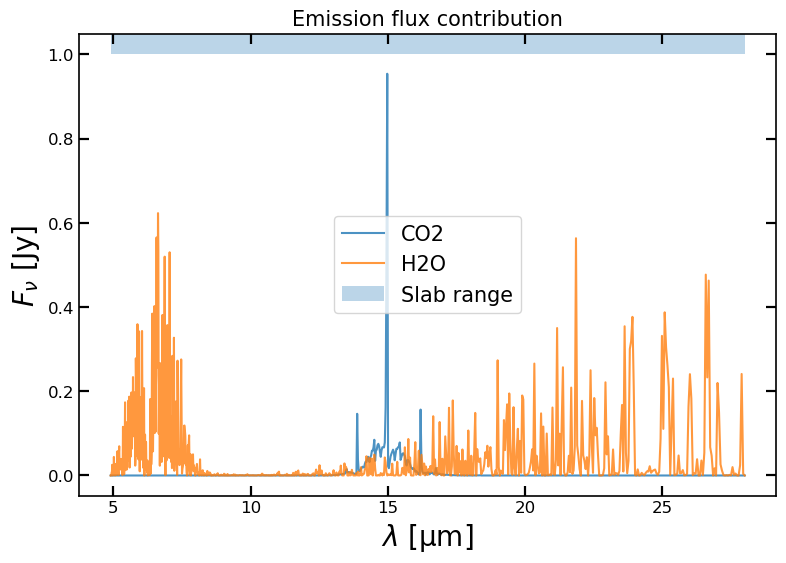

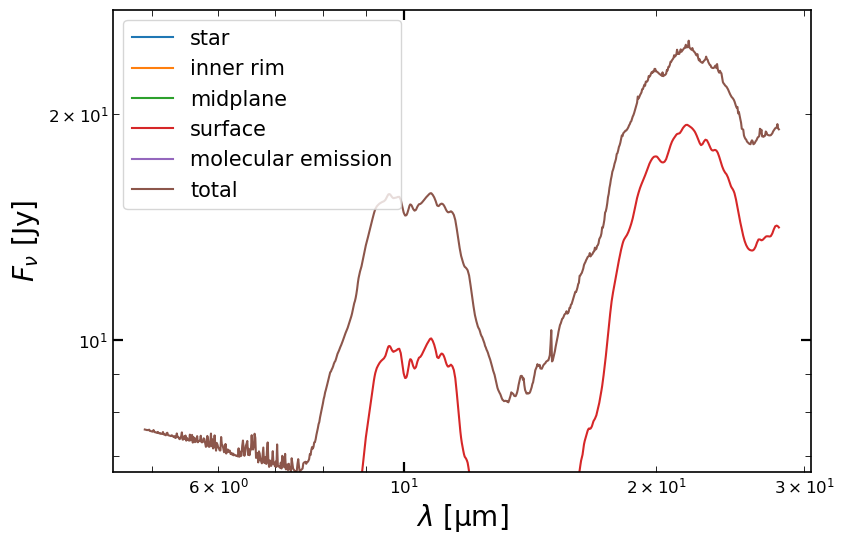

In [39]:

mod.run_model(variables=var_dict,dust_species=abundance_dict,slab_dict=slab_dict,output_all=False,timeit=True)
mod.plot() #this plots the final model


# Exploring the model

-----------
CO2
ColDens_tmin 200
ColDens_slope 0.0
logColDens_min 18.0
inner_part_temp [225 250 275 300 325 350 375 400 425 450 475]
inner_part [5.19509033e-19 5.61495947e-19 5.85707115e-19 5.94965452e-19
 5.92413406e-19 5.81058572e-19 5.63473837e-19 5.41738058e-19
 5.17436354e-19 4.91756182e-19 4.65558084e-19]
upper_in_temp 500
lower_in_temp 200
upper_in 2.197287284314921e-19
lower_in 2.288407025502911e-19
lower_out_temp 200
upper_out_temp 500
lower_out 0.0
upper_out 0.0
-----------
H2O
ColDens_tmin 221
ColDens_slope 0.0
logColDens_min 17.69897000433602
inner_part_temp [250 275 300 325 350 375 400 425 450 475 500 525 550 575 600 625 650 675
 700 725 750 775 800 825 850 875]
upper_in_temp 900
lower_in_temp 225
lower_out_temp 221
upper_out_temp 921.1
inner_part [1.47103371e-19 1.67833292e-19 1.86195431e-19 2.02080893e-19
 2.15276202e-19 2.25740064e-19 2.33569353e-19 2.38916406e-19
 2.41964211e-19 2.42925419e-19 2.42036638e-19 2.39545529e-19
 2.35696944e-19 2.30722515e-19 2.24834658e-19 

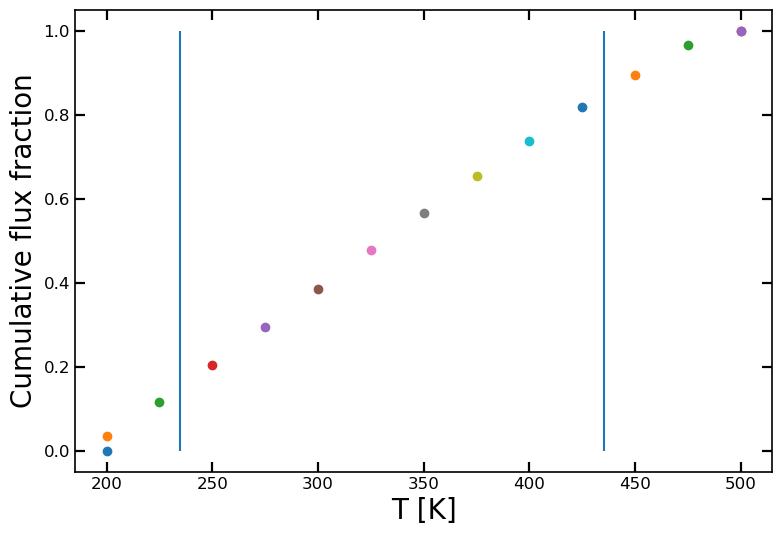

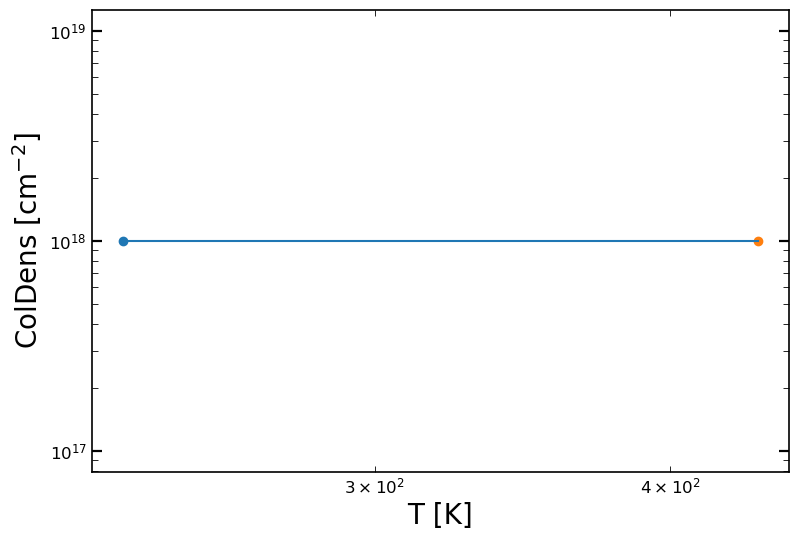

tmax,tmin 500 200
t at max,t at min 435.5484578057625 234.84880152039253


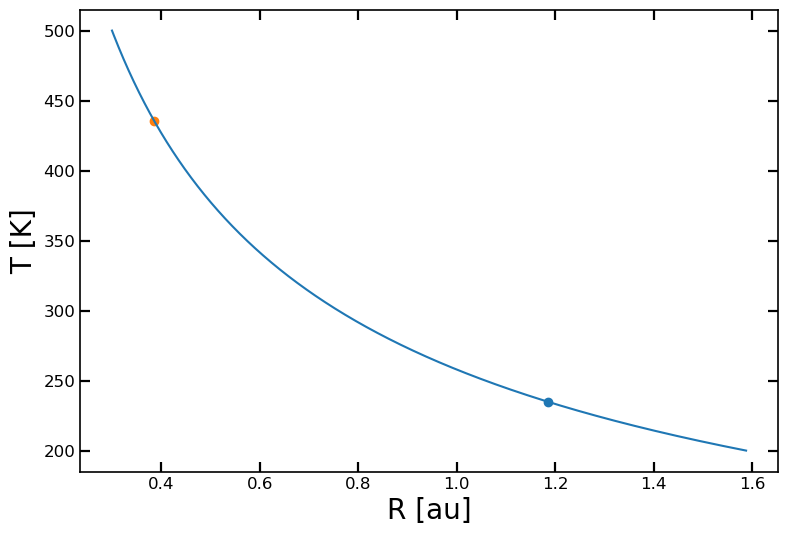

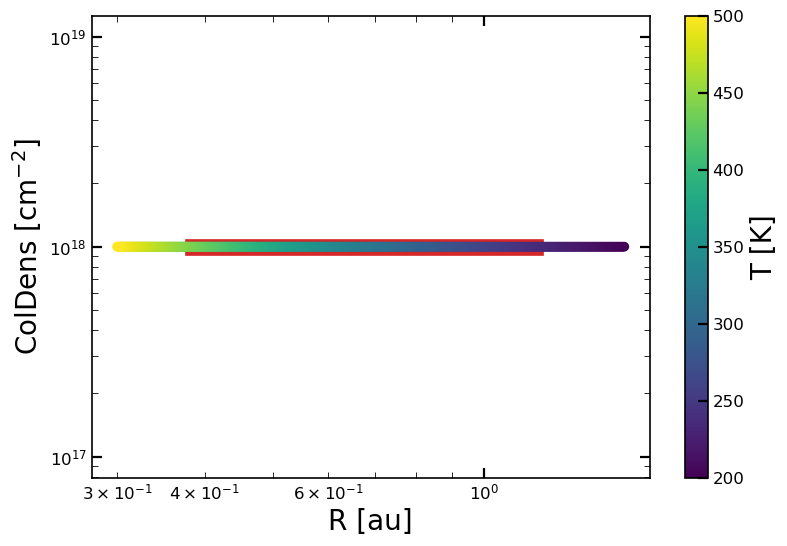

----------------
Keys in output dict
H2O
ColDens_tmin
221
ColDens_slope
0.0
logColDens_min
17.69897000433602
inner_part_temp
[250 275 300 325 350 375 400 425 450 475 500 525 550 575 600 625 650 675
 700 725 750 775 800 825 850 875]
upper_in_temp
900
lower_in_temp
225
lower_out_temp
221
upper_out_temp
921.1
inner_part
[1.47103371e-19 1.67833292e-19 1.86195431e-19 2.02080893e-19
 2.15276202e-19 2.25740064e-19 2.33569353e-19 2.38916406e-19
 2.41964211e-19 2.42925419e-19 2.42036638e-19 2.39545529e-19
 2.35696944e-19 2.30722515e-19 2.24834658e-19 2.18224090e-19
 2.11059659e-19 2.03489446e-19 1.95642397e-19 1.87630031e-19
 1.79548005e-19 1.71477512e-19 1.63486559e-19 1.55631175e-19
 1.47956599e-19 1.40498449e-19]
upper_in
6.664194023562975e-20
upper_out
1.1001206614260438e-19
lower_in
6.192463821393926e-20
lower_out
1.9747023092188085e-20
-----------
H2O
Contributing to total flux: inner_part
Contributing to total flux: upper_in
Contributing to total flux: upper_out
Contributing to total flu

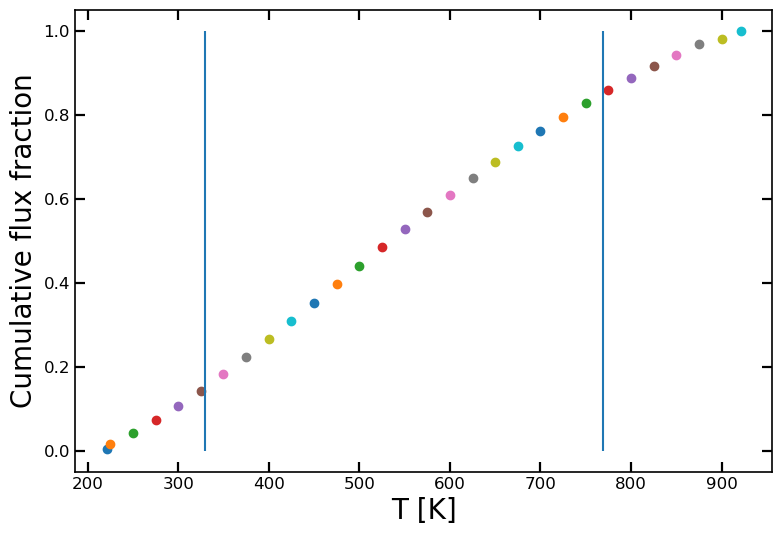

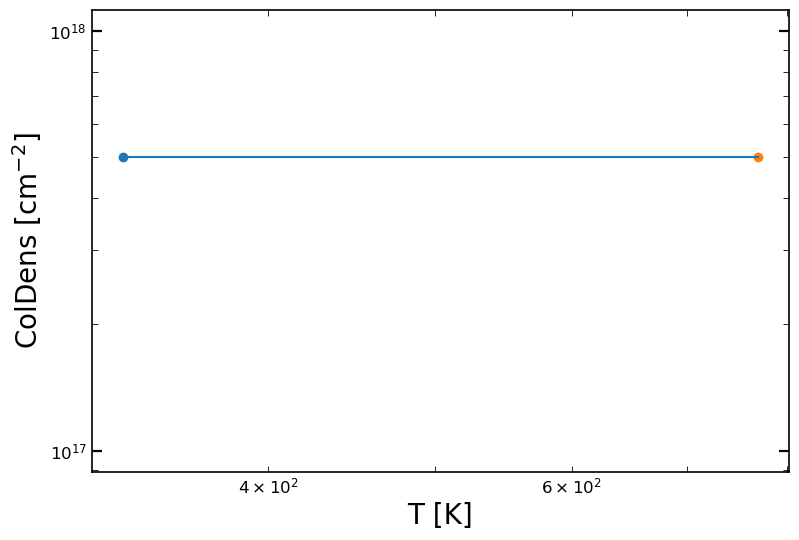

tmax,tmin 921.1 221
t at max,t at min 768.89354495596 329.78767847822314


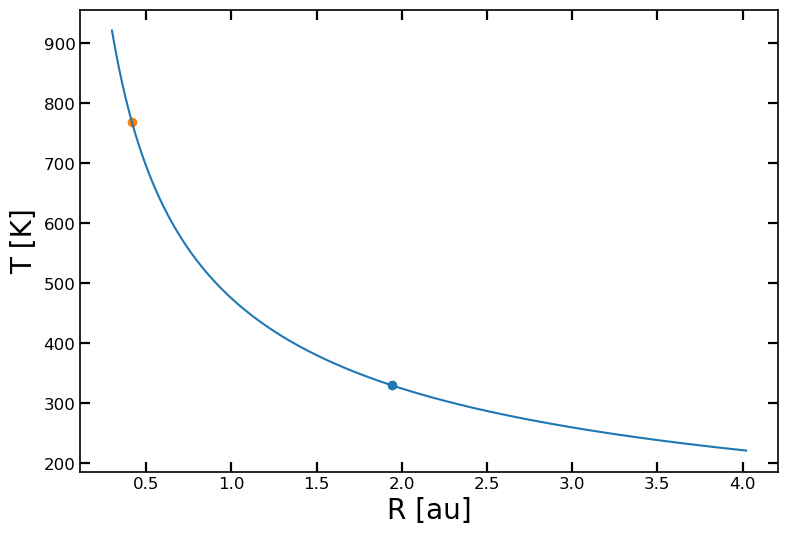

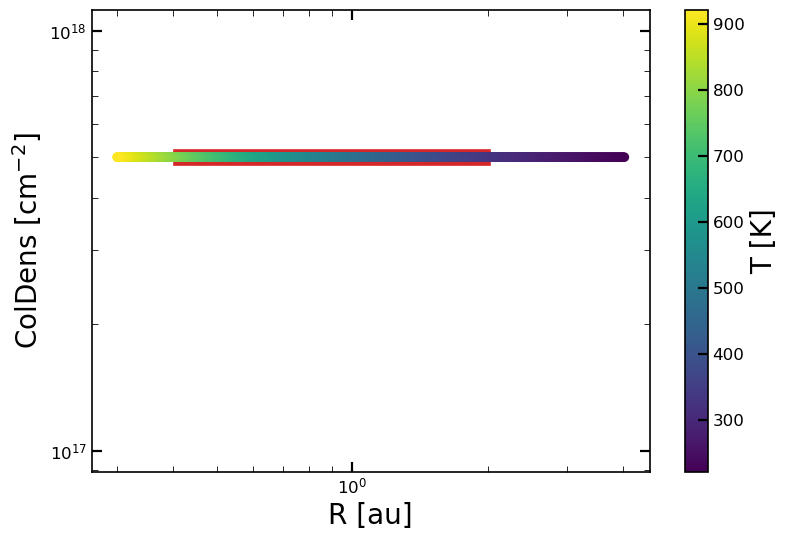

{'CO2': {'radius_eff': 1.120801151760114,
  'tmin,tmax': [234.84880152039253, 435.5484578057625],
  'cmin,cmax': [1e+18, 1e+18],
  'rout,rin': [1.185264221390325, 0.3855594023250057]},
 'H2O': {'radius_eff': 1.896384772898682,
  'tmin,tmax': [329.78767847822314, 768.89354495596],
  'cmin,cmax': [4.9999999999999994e+17, 4.9999999999999994e+17],
  'rout,rin': [1.941609567833945, 0.4166203391846497]}}

In [40]:
#calculating where the emission in the model is coming from
mod.extract_emission_quantities(debug=True)

In [41]:
#calculating the integrated flux of a molecule in a certain wavelength range
mod.calc_integrated_flux('H2O',wave_lims=[14,16])

3.291790914575909e-16

In [42]:
mod.calc_dust_masses(dust_path=dust_path,unit='msun')

{'MgOlivine0.1.Combined.Kappa_rv0.1.dat': 8.248652177652694e-06,
 'MgOlivine2.0.Combined.Kappa_rv2.0.dat': 0.0001649730435530539,
 'MgOlivine5.0.Combined.Kappa_rv5.0.dat': 0.00041243260888263475,
 'MgPyroxene0.1.Combined.Kappa_rv0.1.dat': 7.114740422773216e-06,
 'MgPyroxene2.0.Combined.Kappa_rv2.0.dat': 0.00014229480845546428,
 'MgPyroxene5.0.Combined.Kappa_rv5.0.dat': 0.0003557370211386607,
 'Silica0.1.Combined.Kappa_rv0.1.dat': 4.913617604477751e-06,
 'Silica2.0.Combined.Kappa_rv2.0.dat': 9.8272352089555e-05,
 'Silica5.0.Combined.Kappa_rv5.0.dat': 0.00024568088022388756,
 'Enstatite0.1.Combined.Kappa_rv0.1.dat': 6.225397869926561e-06,
 'Enstatite2.0.Combined.Kappa_rv2.0.dat': 0.00012450795739853124,
 'Enstatite5.0.Combined.Kappa_rv5.0.dat': 0.00031126989349632806,
 'Forsterite0.1.Combined.Kappa_rv0.1.dat': 7.337076060984878e-06,
 'Forsterite2.0.Combined.Kappa_rv2.0.dat': 0.00014674152121969754,
 'Forsterite5.0.Combined.Kappa_rv5.0.dat': 0.00036685380304924385}

here you can check how long the model needs to run

In [43]:
%timeit mod.run_model(variables=var_dict,dust_species=abundance_dict,slab_dict=slab_dict,output_all=False,timeit=False)


708 µs ± 3.06 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Retrieving linear parameters

We are creating new dictionaries that don't include the linear parameters and then we try to determine than using the method that is used during the retrieval

In [44]:
var_dict_new=var_dict
abundance_dict_new={}
for key in abundance_dict:
    abundance_dict_new[key]=None


slab_dict_new=slab_dict
for key in slab_dict:
    slab_dict_new[key]['radius']=None

In [45]:
mod2=complete_model()
mod2.read_data(variables=var_dict,dust_species=abundance_dict,slab_dict=slab_dict,wavelength_points=wavelength,
              slab_prefix='12_',save_binned_data=True,load_binned_data=True,slab_folder=slab_folder,dust_path=dust_path,ext_model=ext_model)


Folder to be searched for pre-binned data:
['/data/tk502/LineData//binned_data/0', '/data/tk502/LineData//binned_data/1', '/data/tk502/LineData//binned_data/2', '/data/tk502/LineData//binned_data/3', '/data/tk502/LineData//binned_data/4', '/data/tk502/LineData//binned_data/5']
Searching:
/data/tk502/LineData//binned_data/0/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/1/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/2/wavelength.npy
True
-----------------------------
Found pre-binned data folder!
/data/tk502/LineData//binned_data/2
-----------------------------
Found data for CO2
Checking for molecular data
Found data for H2O
Checking for molecular data
Precalculating Black bodies


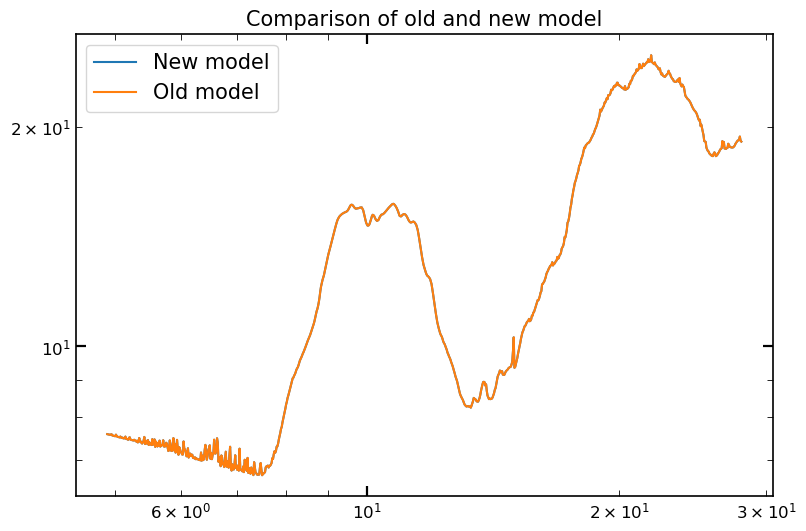

In [46]:
tot_flux_new=mod2.run_fitted_to_obs(variables=var_dict,dust_species=abundance_dict_new,slab_dict=slab_dict_new,flux_obs=mod.tot_flux,lam_obs=mod.xnew,interp=False,debug=False)
plt.title('Comparison of old and new model')
plt.loglog(mod2.xnew,tot_flux_new,label='New model')
plt.loglog(mod.xnew,mod.tot_flux,label='Old model')
plt.legend()
plt.show()

the differences between the old and new model are only extremly small

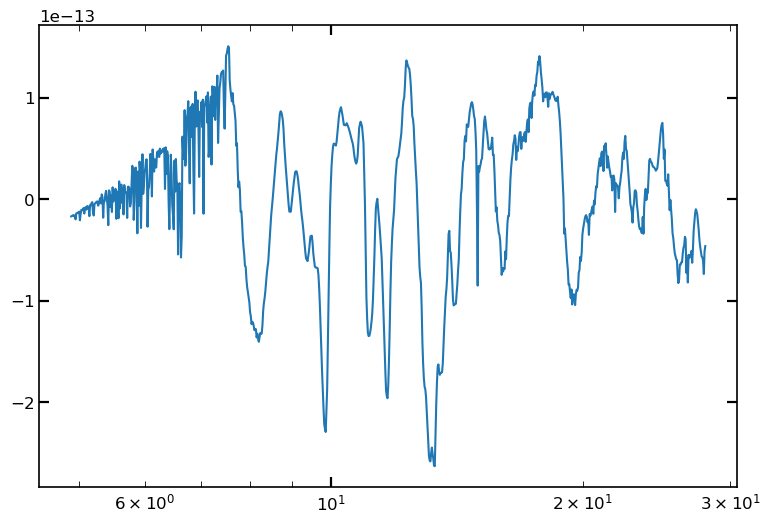

In [47]:
plt.plot(mod.xnew,(mod.tot_flux-tot_flux_new)/tot_flux_new,label='Difference')
plt.xscale('log')
plt.show()

In [48]:
print('Determined scale factors')
print(mod2.scaleparas)

Determined scale factors
[1.e-16 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06
 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 9.e-02 9.e-02]


In [32]:
%timeit mod2.run_fitted_to_obs(variables=var_dict,dust_species=abundance_dict,slab_dict=slab_dict_new,flux_obs=mod.tot_flux,lam_obs=mod.xnew,interp=False,debug=False)


4.29 ms ± 207 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [49]:
#np.save('./Observations/mock_observation_extinction_flux',mod.tot_flux)
#np.save('./Observations/mock_observation_extinction_wave',mod.xnew)
#np.save('./Observations/mock_observation_flux',mod.tot_flux)
#np.save('./Observations/mock_observation_wave',mod.xnew)

### Dust absorption

In [ ]:
var_dict={'tstar':9000,
         'rstar':2.5,
         'distance':140,
         't_rim':1500.6,
         'tmin_s':500.0,
         'tmax_s':1000.0,
         'tmin_mp':99.3,
         'tmax_mp':1100.4,
         'tmax_abs':800.0,
         'tmin_abs':200.0, 
         'sc_ir':5e-17,
         'sc_mid':1e-6,
         'q_mid':-0.6,
         'q_thin':-0.55,
         'q_abs':-0.5,
         'bb_star':True,
         'incl':0.0,
         'Rv':3.1,
         'E(B-V)':0.5}
test_fac=2.0e-7
#test_fac=3e-17
abundance_dict={'MgOlivine0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'MgOlivine1.0.Combined.Kappa_rv1.0.dat',
                #'MgOlivine2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'MgOlivine3.0.Combined.Kappa_rv3.0.dat',
                #'MgOlivine4.0.Combined.Kappa_rv4.0.dat',
                'MgOlivine5.0.Combined.Kappa_rv5.0.dat':test_fac,
                
                
                'MgPyroxene0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'MgPyroxene1.0.Combined.Kappa_rv1.0.dat',
                #'MgPyroxene2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'MgPyroxene3.0.Combined.Kappa_rv3.0.dat',
                #'MgPyroxene4.0.Combined.Kappa_rv4.0.dat',
                'MgPyroxene5.0.Combined.Kappa_rv5.0.dat':test_fac,
                
                
                'Silica0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'Silica1.0.Combined.Kappa_rv1.0.dat',
                'Silica2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'Silica3.0.Combined.Kappa_rv3.0.dat',
                #'Silica4.0.Combined.Kappa_rv4.0.dat',
                'Silica5.0.Combined.Kappa_rv5.0.dat':test_fac,

                'Enstatite0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'Enstatite1.0.Combined.Kappa_rv1.0.dat',
                #'Enstatite2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'Enstatite3.0.Combined.Kappa_rv3.0.dat',
                #'Enstatite4.0.Combined.Kappa_rv4.0.dat',
                'Enstatite5.0.Combined.Kappa_rv5.0.dat':test_fac,

                'Forsterite0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'Forsterite1.0.Combined.Kappa_rv1.0.dat',
                #'Forsterite2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'Forsterite3.0.Combined.Kappa_rv3.0.dat',
                #'Forsterite4.0.Combined.Kappa_rv4.0.dat',
                'Forsterite5.0.Combined.Kappa_rv5.0.dat':test_fac}
test_fac=1.0e-6
#test_fac=3e-17
abundance_dict_absorption={'MgOlivine0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'MgOlivine1.0.Combined.Kappa_rv1.0.dat':test_fac,
                'MgOlivine2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'MgOlivine3.0.Combined.Kappa_rv3.0.dat':test_fac,
                #'MgOlivine4.0.Combined.Kappa_rv4.0.dat':test_fac,
                'MgOlivine5.0.Combined.Kappa_rv5.0.dat':test_fac,
                
                
                'MgPyroxene0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'MgPyroxene1.0.Combined.Kappa_rv1.0.dat':test_fac,
                'MgPyroxene2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'MgPyroxene3.0.Combined.Kappa_rv3.0.dat':test_fac,
                #'MgPyroxene4.0.Combined.Kappa_rv4.0.dat':test_fac,
                'MgPyroxene5.0.Combined.Kappa_rv5.0.dat':test_fac,
                
                
                'Silica0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'Silica1.0.Combined.Kappa_rv1.0.dat':test_fac,
                'Silica2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'Silica3.0.Combined.Kappa_rv3.0.dat':test_fac,
                #'Silica4.0.Combined.Kappa_rv4.0.dat':test_fac,
                'Silica5.0.Combined.Kappa_rv5.0.dat':test_fac,

                'Enstatite0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'Enstatite1.0.Combined.Kappa_rv1.0.dat':test_fac,
                'Enstatite2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'Enstatite3.0.Combined.Kappa_rv3.0.dat':test_fac,
                #'Enstatite4.0.Combined.Kappa_rv4.0.dat':test_fac,
                'Enstatite5.0.Combined.Kappa_rv5.0.dat':test_fac,

                'Forsterite0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'Forsterite1.0.Combined.Kappa_rv1.0.dat':test_fac,
                'Forsterite2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'Forsterite3.0.Combined.Kappa_rv3.0.dat':test_fac,
                #'Forsterite4.0.Combined.Kappa_rv4.0.dat':test_fac,
                'Forsterite5.0.Combined.Kappa_rv5.0.dat':test_fac}

# Others

There are more modes that you can run, like just the slab part of the model.  
I'll create tutorials on that later